<a href="https://colab.research.google.com/github/Ahmedzedan0/Rock-vs-Mine-Sonar-Prediction/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Import Dependencies

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn import metrics

2) Importing Boston House Price dataset

In [14]:
house_price_dataset = sklearn.datasets.load_boston()  
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
house_price_dataframe['price'] = house_price_dataset.target
house_price_dataframe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
house_price_dataframe.shape

(506, 14)

In [19]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

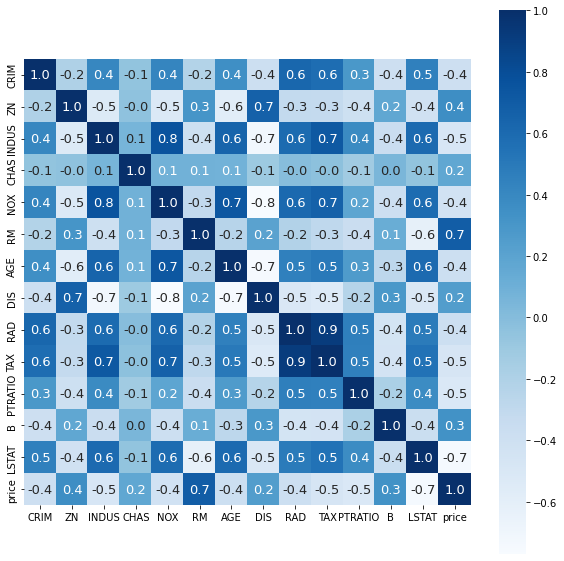

In [34]:
# Understading Correlation between features
correlation = house_price_dataframe.corr()
plt.figure(figsize=(10,10))
# sns.heatmap(house_price_dataframe, vmin=None, vmax=None, cmap=None, center=None,
#             robust=False, annot=None, fmt=".2g", annot_kws=None, linewidths=0, 
#             linecolor="white", cbar=True, cbar_kws=None, cbar_ax=None, 
#             square=False, xticklabels="auto", yticklabels="auto", mask=None, 
#             ax=None)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':13}, cmap='Blues')


In [37]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [42]:
model = XGBRegressor()
model.fit(X_train, Y_train)

[14:58:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [43]:
trainig_data_prediction = model.predict(X_train)
score_1 = metrics.r2_score(Y_train, trainig_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, trainig_data_prediction)
print(score_1)
print(score_2)

0.9733349094832763
1.145314053261634


In [46]:
testing_data_prediction = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, testing_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)
print(score_1)
print(score_2)

0.9115937697657654
1.9922956859364223


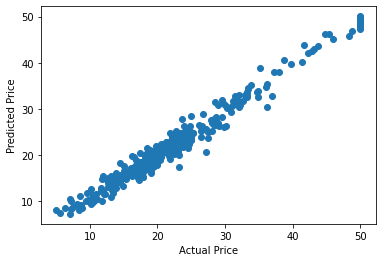

In [47]:
plt.scatter(Y_train, trainig_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show() 